## Chapter 2: Basic audio processing

### 2.1 Handling audio in MATLAB

#### 2.1.1 Recording sound

In [1]:
import sounddevice as sd
import numpy as np

# 변수 설정
sampling_rate = 16000
duration = 8000 / sampling_rate # 초 단위로 변환
channels = 1 # 모노

# 오디오 녹음
speech = sd.rec(int(duration * sampling_rate), samplerate = sampling_rate, channels = channels, dtype = 'float64')


# 녹음 완료 대기
sd.wait()

# 녹음된 오디오 데이터를 numpy 배열로 저장
speech = np.array(speech)

In [2]:
import sounddevice as sd
import numpy as np

# 변수 설정
sampling_rate = 16000 # 16kHz 샘플링 레이트
channels = 1 # 모노 채널
dtype = 'int16' # 16비트 심도

# 녹음 시작 (샘플링 레이트와 채널 수 설정)
duration = 5 # 녹음 시간 설정 (초 단위)
print("녹음 시작")
aro = sd.rec(int(duration * sampling_rate), samplerate = sampling_rate, channels = channels, dtype = dtype)

# 녹음이 끝날 때까지 대기
sd.wait()

# 결과는 numpy 배열에 저장됨
print("녹음 완료")

녹음 시작
녹음 완료


In [3]:
# 녹음된 오디오 재생
print("녹음된 오디오 재생")
sd.play(aro, samplerate = sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()
print("재생 완료")

녹음된 오디오 재생
재생 완료


In [4]:
# 녹음된 오디오 데이터 가져오기(이미 double 형식으로 저장됨)
speech = np.array(aro)

# 오디오 데이터 출력(선택적)
print(speech)

[[  59]
 [-100]
 [ 124]
 ...
 [   1]
 [   3]
 [   7]]


#### 2.1.2 Storing and replaying sound

In [5]:
# 녹음된 오디오 데이터를 8kHz로 재생
sampling_rate = 8000 # 8kHz 샘플링 레이트

# 녹음된 오디오 데이터를 재생
print("오디오 재생 중...")
sd.play(speech, samplerate = sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()
print("오디오 재생 완료")

오디오 재생 중...
오디오 재생 완료


In [6]:
# 데이터 정규화 (speech 데이터의 절대값 중 최대값으로 정규화)
speech_normalized = speech / np.max(np.abs(speech))

# 8kHz 샘플링 레이트로 정규화된 오디오 재생
sampling_rate = 8000
print("정규화된 오디오 재생 중...")
sd.play(speech_normalized, samplerate=sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()
print("오디오 재생 완료")

정규화된 오디오 재생 중...
오디오 재생 완료


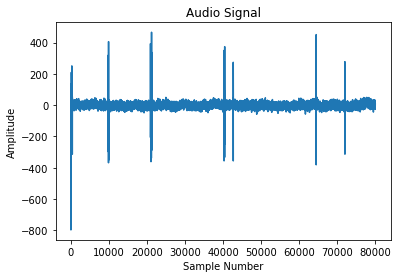

In [7]:
import matplotlib.pyplot as plt

# 오디오 데이터 그래프 그리기
plt.plot(speech)
plt.title("Audio Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()

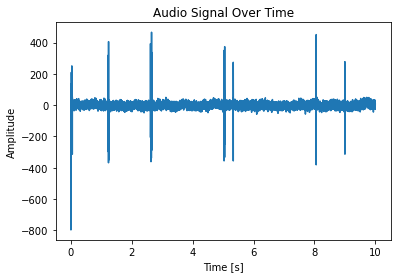

In [8]:
# 시간 축을 생성 (샘플 번호를 샘플링 레이트로 나눔)
time = np.arange(0, len(speech)) / 8000  # 8kHz 샘플링 레이트로 시간 벡터 계산

# 오디오 데이터 그래프 그리기
plt.plot(time, speech)
plt.title("Audio Signal Over Time")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#### 2.1.3 Audio file handling

In [9]:
fid = open('C:/Users/User_Name/Desktop/프로그래밍연습/recording.pcm', 'rb')  # 'rb'는 바이너리 읽기 모드

In [10]:
# 파일을 열고 데이터를 읽음
with open('C:/Users/User_Name/Desktop/프로그래밍연습/recording.pcm', 'rb') as fid:
    # int16 형식으로 파일 끝까지 읽음 (작은 엔디안 형식)
    speech = np.fromfile(fid, dtype=np.int16)

# speech 데이터는 이제 int16 배열로 저장됨

In [11]:
# 파일을 열고 데이터를 읽음
with open('C:/Users/User_Name/Desktop/프로그래밍연습/recording.pcm', 'rb') as fid:
    # uint16 형식의 빅 엔디안 데이터로 파일 끝까지 읽음
    speech = np.fromfile(fid, dtype=np.dtype('>u2'))  # '>u2'는 빅 엔디안 uint16을 의미

# speech 데이터는 이제 uint16 배열로 저장됨

In [12]:
fid.close()

In [13]:
# 이 코드는 교재 본문에 없는 speech2 데이터 생성 코드
# 파일을 열고 데이터를 읽음
with open('C:/Users/User_Name/Desktop/프로그래밍연습/recording2.pcm', 'rb') as fid2:
    # int16 형식으로 파일 끝까지 읽음 (작은 엔디안 형식)
    speech2 = np.fromfile(fid2, dtype=np.int16)

# speech 데이터는 이제 int16 배열로 저장됨

In [14]:
fid2.close()

In [15]:
# ! pip install scipy
import scipy.io

# 두 변수, speech와 speech2를 .mat 파일로 저장
scipy.io.savemat('C:/Users/User_Name/Desktop/프로그래밍연습/myspeech.mat', {'speech': speech, 'speech2': speech2})

In [16]:
# .mat 파일에서 데이터를 로드
data = scipy.io.loadmat('C:/Users/User_Name/Desktop/프로그래밍연습/myspeech.mat')

In [17]:
# 교재 본문에 없는 추가 코드
# 로드된 데이터에 접근 (data는 딕셔너리 형태)
speech = data['speech']
speech2 = data['speech2']

### 2.2 Normalisation

In [18]:
# speech 데이터 초기화 코드
with open('C:/Users/User_Name/Desktop/프로그래밍연습/recording.pcm', 'rb') as fid:
    # int16 형식으로 파일 끝까지 읽음 (작은 엔디안 형식)
    speech = np.fromfile(fid, dtype=np.int16)

# speech 데이터는 이제 int16 배열로 저장됨

# 오디오 데이터를 정규화 (최대 절대값으로 나눔)
speech_normalized = speech / np.max(np.abs(speech))

# 8kHz 샘플링 레이트로 정규화된 오디오 재생
sampling_rate = 8000
print("정규화된 오디오 재생 중...")
sd.play(speech_normalized, samplerate=sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()
print("오디오 재생 완료")

정규화된 오디오 재생 중...
오디오 재생 완료


### 2.3 Audio processing

In [19]:
b = np.array([8], dtype=float)
x = np.array([16], dtype=float)

import scipy.signal as signal

# 필터 적용 (1은 필터 분모 계수에 해당, 즉 단순 FIR 필터임)
y = signal.lfilter(b, [1], x)

print(y)

[128.]


In [20]:
b = np.array([8], dtype=float)
x = np.array([16], dtype=float)
a = np.array([4], dtype=float)

import scipy.signal as signal

# 필터 적용 (1은 필터 분모 계수에 해당, 즉 단순 FIR 필터임)
y = signal.lfilter(b, a, x)

print(y)

[32.]


In [21]:
# 교재 본문에 없는 a_vector 변수 생성 코드
sampling_rate = 1000  # 샘플링 속도 (Hz)
t = np.linspace(0, 1, sampling_rate, endpoint=False)  # 시간 벡터 (1초)
frequency = 5  # 사인파의 주파수 (Hz)
a_vector = np.sin(2 * np.pi * frequency * t)  # 5Hz 사인파

In [22]:
# a_vector에 대해 FFT 수행
a_spec = np.fft.fft(a_vector)

In [23]:
a_spec = np.fft.fft(a_vector, 256)

In [24]:
# a_vector의 첫 256개의 샘플에 대해 FFT 수행
a_spec = np.fft.fft(a_vector[:256])

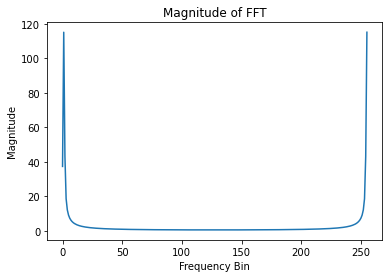

In [25]:
# a_spec의 절대값(크기)을 계산하여 그래프 그리기
plt.plot(np.abs(a_spec))
plt.title("Magnitude of FFT")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.show()

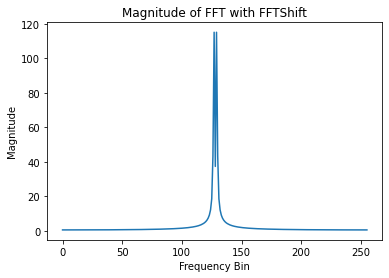

In [26]:
# FFT 결과를 fftshift로 이동하고 절대값을 계산하여 그래프 그리기
a_spec_shifted = np.fft.fftshift(a_spec)
plt.plot(np.abs(a_spec_shifted))
plt.title("Magnitude of FFT with FFTShift")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.show()

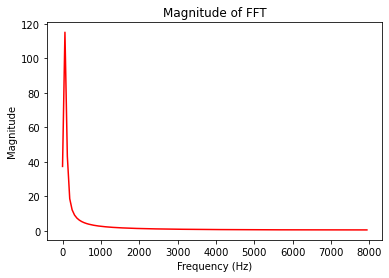

In [27]:
# 샘플링 주파수(Fs)와 신호 길이(Ns) 설정
Fs = 8000  # 예시로 샘플링 주파수 8000 Hz 설정
Ns = 256   # 예시로 신호 길이 256 설정

# 주파수 축 생성 (1부터 Fs까지 2*Fs/Ns 간격으로)
freqs = np.arange(1, Fs, 2 * Fs / Ns)

# FFT 결과의 첫 Ns/2 성분에 대해 크기를 계산
a_spec_magnitude = np.abs(a_spec[:Ns // 2])

# 그래프 그리기 (빨간색 'r')
plt.plot(freqs, a_spec_magnitude, 'r')
plt.title("Magnitude of FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### 2.4 Segmentation

#### 2.4.3 Continuous filtering

In [28]:
# 교재 본문에 없는 s 변수 생성 코드
# s 신호가 있다고 가정 (8kHz 샘플링 속도에서 재생)
# 예를 들어, s가 8kHz 샘플링 속도에서 생성된 신호일 경우
s = np.sin(2 * np.pi * 440 * np.linspace(0, 1, 8000))  # 1초짜리 440Hz 사인파 예시

# 신호를 정규화
s_normalized = s / np.max(np.abs(s))

In [29]:
# 8kHz 샘플링 레이트로 정규화된 오디오 재생
sampling_rate = 8000  # 8kHz 샘플링 속도
sd.play(s_normalized, samplerate=sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()

In [30]:
# h 계수 설정
h = [1, -0.9375]

# s는 입력 신호 (예: 8kHz 사인파 신호)
# 예를 들어, 여기서는 440Hz 사인파 생성
sampling_rate = 8000  # 8kHz 샘플링 속도
duration = 1  # 1초 동안 지속
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
s = np.sin(2 * np.pi * 440 * t)  # 440Hz 사인파

# 필터 적용
y = signal.lfilter(h, [1], s)

# 필터링된 신호를 정규화하여 재생
y_normalized = y / np.max(np.abs(y))
sd.play(y_normalized, samplerate=sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()

In [31]:
# 파라미터 설정
w = 240  # 세그먼트의 길이

# 세그먼트 수 계산
n = int(np.floor(len(s) / w))

# 결과 신호를 저장할 배열 초기화
outsp = np.zeros_like(s)

# 각 세그먼트에 필터 적용
for k in range(n):
    seg = s[k * w:(k + 1) * w]  # 세그먼트 추출
    segf = signal.lfilter(h, [1], seg)  # 필터 적용
    outsp[k * w:(k + 1) * w] = segf  # 결과 저장

# 필터링된 신호를 정규화하여 재생
outsp_normalized = outsp / np.max(np.abs(outsp))
sd.play(outsp_normalized, samplerate=sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()

In [32]:
# 파라미터 설정
w = 240  # 세그먼트의 길이

# 세그먼트 수 계산
n = int(np.floor(len(s) / w))

# 결과 신호를 저장할 배열 초기화
outsp2 = np.zeros_like(s)

# 필터 초기 상태 (zero initial conditions)
zi = signal.lfilter_zi(h, [1])

# 각 세그먼트에 필터 적용
for k in range(n):
    seg = s[k * w:(k + 1) * w]  # 세그먼트 추출
    segf, zi = signal.lfilter(h, [1], seg, zi=zi)  # 필터 적용 및 상태 업데이트
    outsp2[k * w:(k + 1) * w] = segf  # 결과 저장

# 필터링된 신호를 정규화하여 재생
outsp2_normalized = outsp2 / np.max(np.abs(outsp2))
sd.play(outsp2_normalized, samplerate=sampling_rate)

# 재생이 끝날 때까지 대기
sd.wait()

### 2.6 Visualisation

#### 2.6.1 A brief note on axes

In [33]:
# 교재 본문에 없는 spectrum 변수 생성 코드

# 예시 신호 (440Hz 사인파)
sampling_rate = 8000
duration = 1.0  # 1초 동안의 신호
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal = np.sin(2 * np.pi * 440 * t)  # 440Hz 사인파

# FFT 적용
spectrum = np.abs(np.fft.fft(signal))

# 주파수 성분의 절반만 사용 (대칭 성질 때문에)
spectrum = spectrum[:len(spectrum) // 2]

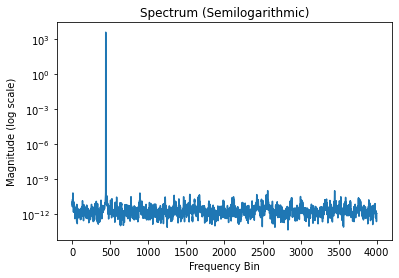

In [34]:
# semilogy 그래프 그리기
plt.semilogy(spectrum)
plt.title("Spectrum (Semilogarithmic)")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude (log scale)")
plt.show()

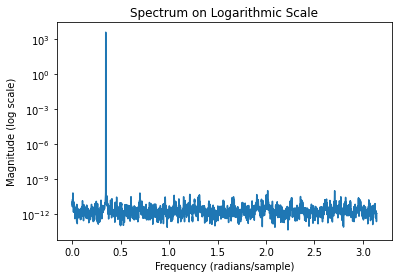

In [35]:
# res 계산
res = np.pi / len(spectrum)

# x축 값 생성 (res에서 π까지)
x_values = np.arange(res, np.pi + res, res)

# 로그 스케일로 스펙트럼 플롯
plt.semilogy(x_values, spectrum)
plt.title("Spectrum on Logarithmic Scale")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Magnitude (log scale)")
plt.show()

#### 2.6.2 Other visualisation methods

##### 2.6.2.1 Correlogram

In [36]:
# 교재 본문에 없는 x, y 변수 생성 코드
# 예시 신호 x와 y
x = np.random.randn(100)  # 예시 신호 x
y = np.random.randn(100)  # 예시 신호 y

In [37]:
import scipy.signal as signal

# 상호상관 계산
c = signal.correlate(x, y, mode='full')

# 지연(lags) 계산
lags = np.arange(-len(x) + 1, len(y))

# 결과 출력
print("Cross-correlation:", c)
print("Lags:", lags)

Cross-correlation: [-8.51706858e-02  6.70970589e-01  5.35474415e-01 -5.51754616e-01
 -1.65934560e+00 -4.36042903e+00 -8.56566505e-01 -5.86466192e+00
  5.75188367e-01 -5.66686666e-01  3.01958068e+00  9.62451019e-01
 -3.75241519e-01 -8.34626583e-01  1.22409722e+00  1.91499134e+00
 -2.36899614e+00 -4.73410740e+00 -3.04554582e-01 -8.21180521e+00
 -5.40629152e+00 -7.32168708e+00  4.28324382e+00  1.63660290e+00
 -4.06894191e+00  9.63488151e-02 -3.04153948e+00 -5.10579043e+00
 -3.28045978e+00 -1.54216177e+00  2.45012363e+00 -3.86367202e-01
 -9.01814768e+00  1.72412408e+00 -3.11985371e-01 -5.14275543e+00
 -1.69288283e+01 -5.89192194e+00 -3.09913614e+00  4.11715704e+00
  3.30712095e+00 -2.06871909e+00 -6.32870221e+00 -2.51046358e+00
 -4.59146802e+00 -6.04016854e+00 -1.00979247e+01 -6.26197844e+00
 -7.79886898e+00  4.48703409e-01  9.42655436e-01 -1.23870802e+01
  2.99765812e+00  2.51540370e+00 -5.26487738e+00 -1.91798875e+01
 -6.69061896e+00 -1.68387292e+01  6.90538656e+00 -5.58650253e+00
 -8.19

In [38]:
segment = speech[9000:10001]

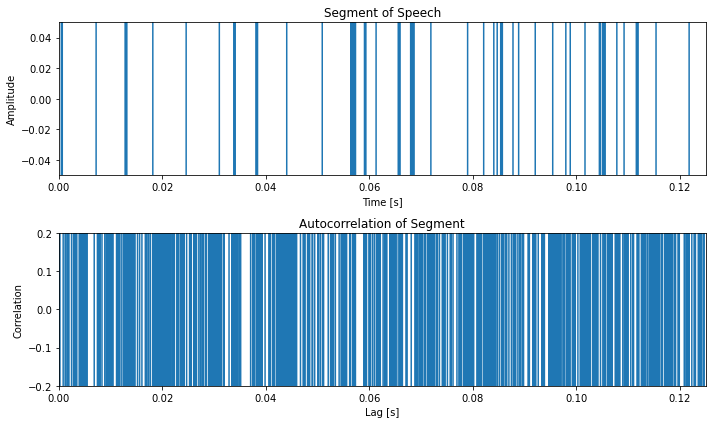

In [39]:
# 자기상관 계산
c = signal.correlate(segment, segment, mode='full')

# 지연(lags) 계산
lags = np.arange(-len(segment) + 1, len(segment))

# 서브플롯 생성
plt.figure(figsize=(10, 6))

# 첫 번째 서브플롯 - 신호 plot
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, 1001) / 8000, segment)
plt.axis([0, 0.125, -0.05, 0.05])
plt.title('Segment of Speech')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# 두 번째 서브플롯 - 자기상관 plot
plt.subplot(2, 1, 2)
plt.plot(lags[1000:2001] / 8000, c[1000:2001])
plt.axis([0, 0.125, -0.2, 0.2])
plt.title('Autocorrelation of Segment')
plt.xlabel('Lag [s]')
plt.ylabel('Correlation')

# 그래프 표시
plt.tight_layout()
plt.show()

##### 2.6.2.2 Cepstrum

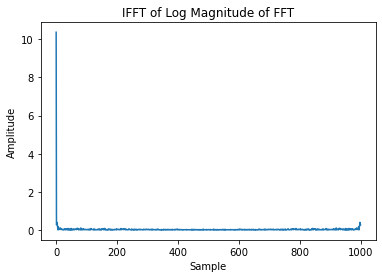

In [40]:
# Hamming 창 적용
windowed_segment = np.hamming(len(segment)) * segment

# FFT 적용 및 로그 크기 계산
ps = np.log(np.abs(np.fft.fft(windowed_segment)))

# IFFT 적용
ifft_result = np.abs(np.fft.ifft(ps))

# 결과 플롯
plt.plot(ifft_result)
plt.title("IFFT of Log Magnitude of FFT")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

### 2.7 Sound generation

#### 2.7.1 Pure tone generation

In [41]:
def tonegen(Ft, Fs, Td):
    # 시간 벡터 생성
    t = np.arange(1, Fs * Td + 1) / Fs
    # 사인파 생성
    s = np.sin(2 * np.pi * Ft * t)
    return s

In [42]:
# 440Hz 톤 생성 (16kHz 샘플링 속도로 2초 동안)
note = tonegen(440, 16000, 2)

# 정규화된 사운드 재생
sd.play(note / np.max(np.abs(note)), samplerate=16000)
sd.wait()  # 재생이 끝날 때까지 대기

#### 2.7.2 White noise generation

In [43]:
# 샘플링 속도 Fs와 지속 시간 Td에 따라 랜덤 노이즈 생성
Fs = 16000  # 예시 샘플링 속도
Td = 2  # 예시 지속 시간 (2초)

# 1D 배열의 균등 분포에서 난수 생성 (크기: Fs * Td)
noise = np.random.rand(Fs * Td)

#### 2.7.3 Variable tone generation

In [44]:
def freqgen(frc, Fs):
    # 초기화
    th = 0
    fr = frc * 2 * np.pi / Fs  # 주파수를 샘플링 속도로 정규화
    snd = np.zeros(len(fr))  # 출력 신호 배열 초기화
    
    # 사인파 생성
    for si in range(len(fr)):
        th += fr[si]
        snd[si] = np.sin(th)
        th = np.unwrap([th])[0]  # th 값이 2pi를 넘어가면 unwrap
    
    return snd

In [45]:
# 주파수 배열 생성
freq = np.concatenate([440 * np.ones(1000), 415.2 * np.ones(1000), 392 * np.ones(1000)])

# 주파수 배열로 신호 생성
music = freqgen(freq, 8000)

# 생성된 음악을 재생
sd.play(music / np.max(np.abs(music)), samplerate=8000)
sd.wait()  # 재생이 끝날 때까지 대기

#### 2.7.4 Mixing sounds

In [46]:
# 각각의 톤을 생성 (주파수: C, E, G, B)
C = tonegen(261.63, 8000, 2)  # C4 주파수
E = tonegen(329.63, 8000, 2)  # E4 주파수
G = tonegen(783.99, 8000, 2)  # G5 주파수
B = tonegen(987.77, 8000, 2)  # B5 주파수

# 신호 합산
combined_signal = C + E + G + B

# 정규화된 사운드 재생
sd.play(combined_signal / np.max(np.abs(combined_signal)), samplerate=8000)
sd.wait()  # 재생이 끝날 때까지 대기

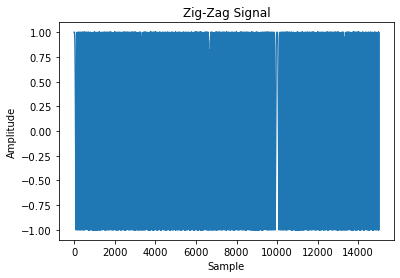

In [47]:
from scipy.signal import chirp

# 주파수 첩(chirp) 생성 (0초에서 5초 동안 0Hz에서 500Hz로 증가)
t = np.arange(0, 5, 0.001)  # 시간 벡터 생성
y = chirp(t, f0=0, t1=5, f1=500)

# "지그재그" 신호 생성
z = np.concatenate([y, y[::-1], y])

# 결과 확인을 위해 플롯 (옵션)
plt.plot(z)
plt.title('Zig-Zag Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

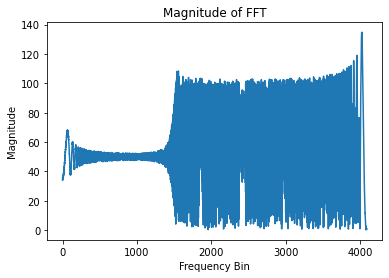

In [48]:
# z 신호에 대해 8192포인트 FFT 수행
f = np.abs(np.fft.fft(z, 8192))

# 첫 4096개의 주파수 성분을 플롯
plt.plot(f[:4096])
plt.title('Magnitude of FFT')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.show()

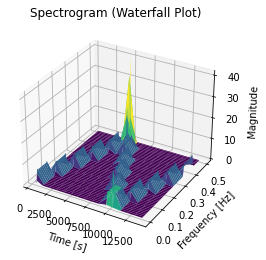

In [49]:
from scipy.signal import spectrogram
from mpl_toolkits.mplot3d import Axes3D

# 스펙트로그램 계산
frequencies, times, Sxx = spectrogram(z, nperseg=1024)

# 절대값을 취한 스펙트로그램
Sxx_abs = np.abs(Sxx)

# 워터폴 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 워터폴 데이터를 meshgrid로 구성
X, Y = np.meshgrid(times, frequencies)

# 3D 플롯 생성 (워터폴 플롯)
ax.plot_surface(X, Y, Sxx_abs, cmap='viridis')

ax.set_title('Spectrogram (Waterfall Plot)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Frequency [Hz]')
ax.set_zlabel('Magnitude')

plt.show()